# Natural Language Processing Project

In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews using the pipeline method.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! 

# Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
yelp = pd.read_csv('C:\\Users\\ASUS\\Desktop\\Coding\\python\\anaconda\\Anaconda3 (64-bit)\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing\\yelp.csv')

## Data preparation

** Checking the head, info , and describe methods on yelp.**

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [7]:
yelp['text length'] = yelp['text'].apply(len)

## Exploritory Data Analysis (E.D.A)

Let's explore the data

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

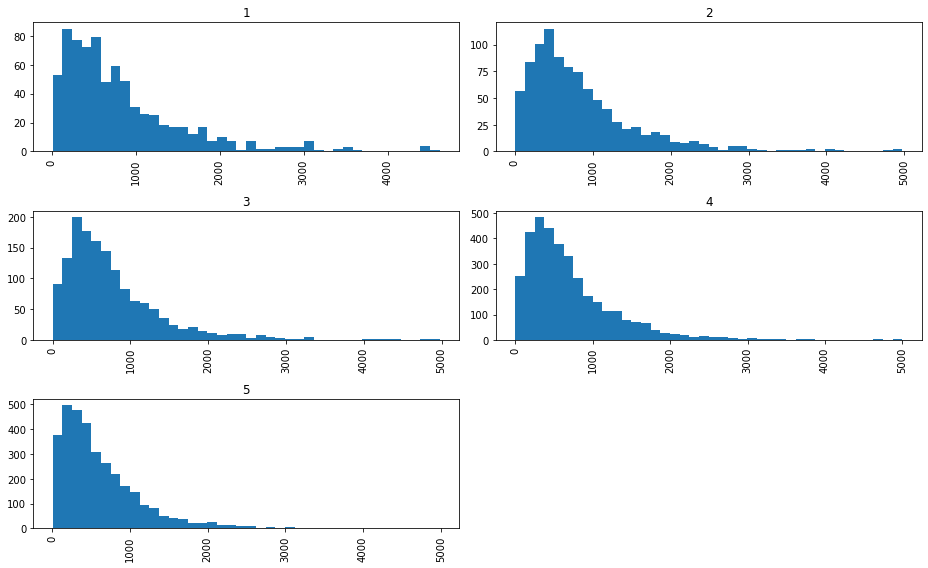

In [8]:
yelp.hist(column='text length',by='stars',figsize=(13,8),bins=40)
plt.tight_layout()

**Creating a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

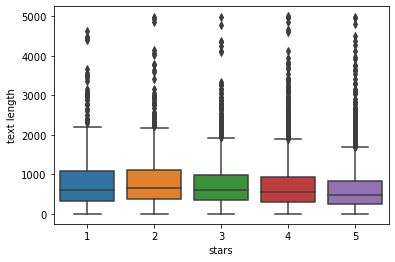

In [9]:
sns.boxplot(data=yelp,x='stars',y='text length')

**Creating a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

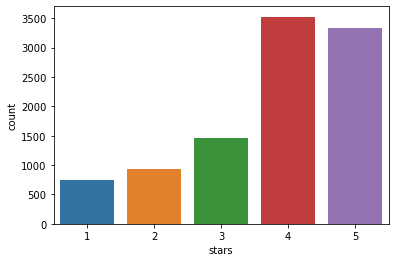

In [12]:
sns.countplot(yelp['stars'])

** Using groupby to get the mean values of the numerical columns and checking if there is any correlation**

In [13]:
yelp_gp = yelp.groupby('stars')[['cool','useful','funny','text length']].mean()

In [14]:
yelp_gp

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [15]:
yelp_gp.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


** Using seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

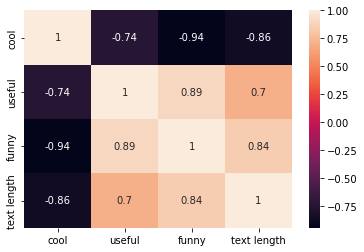

In [19]:
sns.heatmap(yelp_gp.corr(),annot=True)

# NLP Classification Task

Grabbing only reviews that were either 1 star or 5 stars.

**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [21]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [22]:
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

** Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class.**

In [23]:
X=yelp_class['text']
y=yelp_class['stars']

**Importing CountVectorizer and creating a CountVectorizer object.**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer().fit(yelp_class['text'])

** Using the fit_transform method on the CountVectorizer object and passing in X (the 'text' column).**

In [27]:
X=cv.fit_transform(yelp_class['text'])

# Train Test Split



In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Training a Model

** Importing MultinomialNB and creating an instance of the estimator then fitting the training data.**

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
mlb = MultinomialNB()

In [32]:
mlb.fit(X_train,y_train)

MultinomialNB()

# Predictions and Evaluations

**Using the predict method off of mlb to predict labels from X_test.**
**Then creating a confusion matrix and classification report using the predictions and y_test to see how well our model did**

In [33]:
predictions = mlb.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 168   79]
 [  29 1073]]


              precision    recall  f1-score   support

           1       0.85      0.68      0.76       247
           5       0.93      0.97      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.89      0.83      0.85      1349
weighted avg       0.92      0.92      0.92      1349



# Using Text Processing

** Importing TfidfTransformer and pipeline from sklearn. **

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

** Now we will be creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [37]:
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('mlb',MultinomialNB())
])

**Redoing the train test split on the yelp_class object.**

In [38]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('mlb', MultinomialNB())])

### Predictions and Evaluation

In [40]:
pred = pipeline.predict(X_test)

In [41]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[   0  247]
 [   0 1102]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       247
           5       0.82      1.00      0.90      1102

    accuracy                           0.82      1349
   macro avg       0.41      0.50      0.45      1349
weighted avg       0.67      0.82      0.73      1349



Looks like Tf-Idf actually made things worse! therefore we will go with our previous model